In [2]:
import scipy.stats as s
import numpy as np
import matplotlib.pyplot as plt
from os import path
import seaborn as sns
import pandas as pd
import sys
from pathlib import Path
import os
import pingouin as pg

# Import project specific modules and enable automatic reloading
eraser_path = Path(os.getcwd()).parent
reinstatement_path = eraser_path.parent / 'FearReinstatement'
sys.path.append(str(eraser_path))
sys.path.append(str(reinstatement_path))
%load_ext autoreload
%autoreload 2

import eraser_reference as err
import er_plot_functions as erp
from plotting import Fig, pretty_plot, FigMirror, fix_xlabels
import placefield_stability as pfs
import Placefields as pf
import discrimination as discr
import ca_traces as trc
import helpers

### Generate helper functions

In [3]:
# Fix for only certain xticks appearing...
def fix_xticks(ax, days_plot = [-2, -1, 4, 1, 2, 7]):
    days_str = [str(e) for e in days_plot]
    plt.sca(ax)
    plt.xticks(list(range(len(days_plot))), days_str)


In [4]:
def get_group(row):
    if row.Mouse in err.learners:
        return "Learners"
    elif row.Mouse in err.nonlearners:
        return "Non-Learners"
    elif row.Mouse in err.ani_mice_good:
        return "ANI"
# get_group(DI_df.iloc[0,:])

### Set up plots

In [135]:
# Set up main figure plotting
%matplotlib ipympl
FigS3 = Fig(num="S3", grid=(4, 4), size=(7.83, 5.57), fontsize=7)
print(FigS3.fig.get_size_inches())

[7.83 5.57]


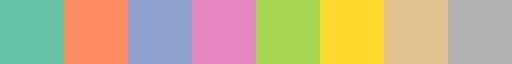

In [6]:
plt.get_cmap('Set2')

### Aggregate animal freezing into DataFrame

In [31]:
df_list = []
days = [-2, -1, 0, 4, 1, 2, 7]
arenas = ["Neutral", "Shock"]
for grp, grp_name in zip([err.learners, err.nonlearners, err.ani_mice_good], 
                         ["Learners", "Non-Learners", "ANI"]):
    fratios = erp.get_all_freezing(grp, day_des=days, arenas=arenas)
    mouse_names = np.repeat(np.array(grp)[None, :], fratios.shape[1], axis=0)
    days_mat = np.repeat(np.array(days)[:, None], fratios.shape[2], axis=1)
    for ida, arena in enumerate(arenas):
        df_list.append(pd.DataFrame({"Name": mouse_names.reshape(-1), "Arena": arena, "Day": days_mat.reshape(-1), 
                                     "Freeze Ratio": fratios[ida].reshape(-1), "Group" : grp_name}))

df_freeze = pd.concat(df_list, axis=0, ignore_index=True)
df_freeze["Day"] = pd.Categorical(df_freeze["Day"], [-2, -1, 0, 4, 1, 2, 7])
df_freeze["Exp. Group"] = df_freeze.apply(lambda row: "Ctrl" if row["Group"] in ["Learners", "Non-Learners"] else "ANI", axis=1)
df_freeze.sample(5)

/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181126_1_openfield: nbadpts = 18 max_in_a_row = 3
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181127_1_openfield: nbadpts = 10 max_in_a_row = 4
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181128_1_openfield: nbadpts = 50 max_in_a_row = 12
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble6/20180419_1_openfield: nbadpts = 13 max_in_a_row = 5
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble6/20180421_1_openfield: nbadpts = 63 max_in_a_row = 38
['Unknown file missing and/or IndexError for Marble06 Neutral 7']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble06 Shock 7']
Freezing left as NaN for this session
/Users/nkinsky/Documents/BU/Working/Eraser/Anisomycin Group/Marble19/20180926_2_fcbox: nbadpts = 15 max_in_a_row = 4
/Users/nkinsky/Documents/BU/Working/Eraser/Anisomycin Group/Marble20_10Hz/20181010_1_op

,Name,Arena,Day,Freeze Ratio,Group,Exp. Group
22,Marble24,Neutral,2,0.060167,Learners,Ctrl
124,Marble18,Neutral,2,0.020246,ANI,ANI
46,Marble24,Shock,1,0.468833,Learners,Ctrl
147,Marble25,Shock,0,0.004255,ANI,ANI
48,Marble07,Shock,2,0.501336,Learners,Ctrl


### S3B: Plot for all mice in Shock arena prior to conditioning

In [136]:
match_ylims = [0.03, 0.92]
match_ylims2 = [-0.03, 0.92]

/var/folders/7g/v7xwy2z52hxcjg7pfsxbb8zc0000gn/T/ipykernel_18305/2107548264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shock["Day"] = pd.Categorical(df_shock["Day"], [-2, -1, 4])


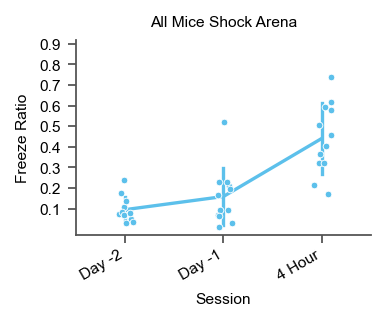

In [137]:
ashock = FigS3.subplot(442)
df_shock = df_freeze[((df_freeze.Day == -2) | (df_freeze.Day == -1) | (df_freeze.Day == 4)) & (df_freeze.Arena == "Shock")]
df_shock["Day"] = pd.Categorical(df_shock["Day"], [-2, -1, 4])
sns.stripplot(data=df_shock, x='Day', y='Freeze Ratio', size=3, linewidth=0.4, edgecolor='w', ax=ashock)
sns.pointplot(data=df_shock, x='Day', y='Freeze Ratio', errorbar='sd', markersize=0,linewidth=1.5, ax=ashock)
ashock.set_ylim(match_ylims2)
ashock.set_yticks(np.arange(0.1, 1.0, 0.1))
ashock.set_title("All Mice Shock Arena")
fix_xlabels(ashock, rotate=True)
FigS3.fig

### S3C: Plot for all mice in neutral right before and after conditioning

/var/folders/7g/v7xwy2z52hxcjg7pfsxbb8zc0000gn/T/ipykernel_18305/329944183.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neutral["Day"] = pd.Categorical(df_neutral["Day"], [0, 4, 1])


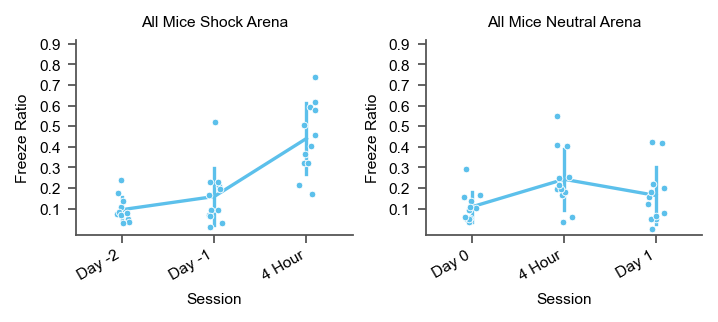

In [138]:
aneutral = FigS3.subplot(443)
df_neutral = df_freeze[((df_freeze.Day == 0) | (df_freeze.Day == 1) | (df_freeze.Day == 4)) & (df_freeze.Arena == "Neutral")]
df_neutral["Day"] = pd.Categorical(df_neutral["Day"], [0, 4, 1])
sns.stripplot(data=df_neutral, x='Day', y='Freeze Ratio', size=3, linewidth=0.4, edgecolor='w', ax=aneutral)
sns.pointplot(data=df_neutral, x='Day', y='Freeze Ratio', errorbar='sd', markersize=0,linewidth=1.5, ax=aneutral)
aneutral.set_ylim(match_ylims2)
aneutral.set_yticks(np.arange(0.1, 1.0, 0.1))
aneutral.set_title("All Mice Neutral Arena")
fix_xlabels(aneutral, rotate=True)
FigS3.fig

### Plot lines for four hour mean + sd to overlay on Figure S3A

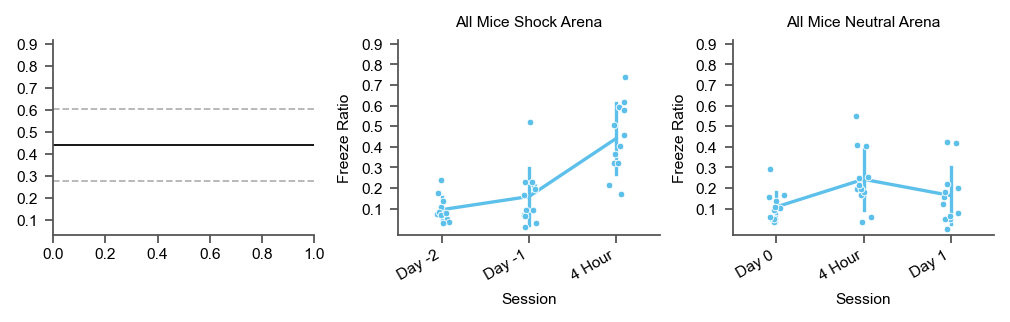

In [139]:
aproxy = FigS3.subplot(441)
df_shock = df_freeze[((df_freeze.Day == 0) | (df_freeze.Day == 1) | (df_freeze.Day == 4)) & (df_freeze.Arena == "Shock")]
mean_4hr = np.nanmean(df_shock[df_shock.Day == 4]['Freeze Ratio'].values)
std_4hr = np.nanstd(df_shock[df_shock.Day == 4]['Freeze Ratio'].values)
aproxy.axhline(mean_4hr, 0, 1, color='k', linewidth=0.8)
aproxy.axhline(mean_4hr - std_4hr, 0, 1, color=[0, 0, 0, 0.3], linestyle='--', linewidth=0.8)
aproxy.axhline(mean_4hr + std_4hr, 0, 1, color=[0, 0, 0, 0.3], linestyle='--', linewidth=0.8)
# aproxy.axhspan(mean_4hr - std_4hr, mean_4hr + std_4hr, 0, 1, color=[0, 0, 0, 0.2])
aproxy.set_ylim(match_ylims)
aproxy.set_yticks(np.arange(0.1, 1.0, 0.1))

FigS3.fig

In [140]:
FigS3.savefig(Path('/Users/nkinsky/Documents/BU/Working/Eraser/plots/FigS3_ANI_and_behavior.pdf'), 
              scriptname='Figure_S3_ANI_behavioral_effects.ipynb')